## Visualizations

C:\Users\Dome\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


         BOROUGH   SALE PRICE
0      Manhattan  22416870654
1      The Bronx   9211201443
2         Queens   8641843508
3  Staten Island   2974421317
4       Brooklyn   2488565584
         BOROUGH  COUNT
0       Brooklyn  10664
1      Manhattan  22210
2         Queens  33706
3  Staten Island  12671
4      The Bronx  39177


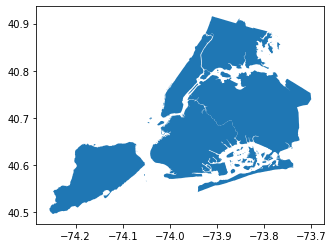

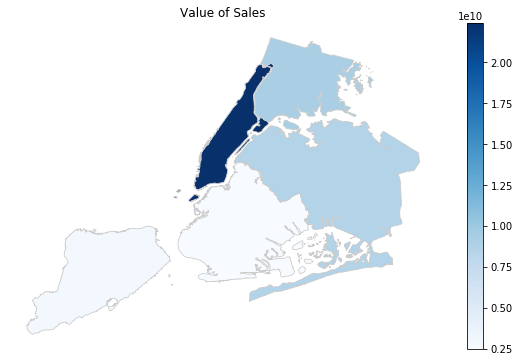

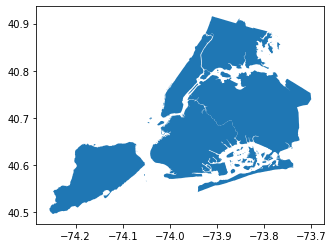

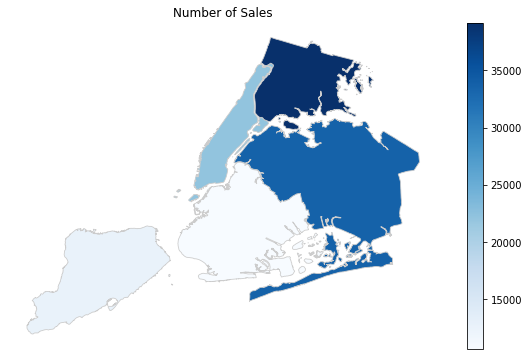

In [2]:
# Imports
import pandas as pd
import functions as fc
import geopandas as gdp
import matplotlib.pyplot as plt


# Read input file
sales_frame = fc.read_german_csv("data/nyc-rolling-sales_2003.csv")

#print(sales_frame.head())
#print(sales_frame.dtypes)

# Changing format of boroughs to string (from int)
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].apply(str)
# Replacing the "." and the "$" in the string and changing format of sale price to numeric (from str)
sales_frame["SALE PRICE"] = sales_frame["SALE PRICE"].str.replace(".", "")
sales_frame["SALE PRICE"] = sales_frame["SALE PRICE"].str.replace("$", "")
sales_frame["SALE PRICE"] = pd.to_numeric(sales_frame["SALE PRICE"], errors="coerce")
# Changing format of sale date to datetime (from str)
sales_frame["SALE DATE"] = pd.to_datetime(sales_frame["SALE DATE"], errors="coerce")
# Changing LSF and GSF to numeric values (from str)
sales_frame["LAND SQUARE FEET"] = pd.to_numeric(sales_frame["LAND SQUARE FEET"], errors="coerce")
sales_frame["GROSS SQUARE FEET"] = pd.to_numeric(sales_frame["GROSS SQUARE FEET"], errors="coerce")

# Replacing numbers of boroughs with actual name
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["1"], "Manhattan")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["2"], "Brooklyn")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["3"], "Queens")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["4"], "The Bronx")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["5"], "Staten Island")

# Grouping by Borough (SALE PRICE)
sales_frame_borough_price = sales_frame.groupby(["BOROUGH"])
groupedby_borough_price = sales_frame_borough_price["SALE PRICE"].sum().reset_index(name="Index")
groupedby_borough_price.columns = ["BOROUGH", "SALE PRICE"]

# Sorting after highest value
groupedby_borough_price = groupedby_borough_price.sort_values("SALE PRICE", ascending=False)

# Suppressing scientific float notation
pd.options.display.float_format = "{:.2f}".format

# Resetting index and printing new dataframe
groupedby_borough_price = groupedby_borough_price.reset_index(drop=True)
print(groupedby_borough_price)

# Grouping by Borough (VALUE COUNTS)
sales_frame_borough_counts = sales_frame.groupby(["BOROUGH"])
print(sales_frame_borough_counts)
groupedby_borough_counts = sales_frame_borough_counts["SALE PRICE"].count().reset_index(name="Index")
groupedby_borough_counts.columns = ["BOROUGH", "COUNT"]

# Sorting after highest value
#groupedby_borough_counts = groupedby_borough_counts.sort_values("SALE PRICE", ascending=False)

# Resetting index and printing new dataframe
#groupedby_borough_counts = groupedby_borough_counts.reset_index(drop=True)
print(groupedby_borough_counts)

# conda install geopandas / conda install descartes
fp = "data/geo_nyc.shp"
map_df = gdp.read_file(fp)
# adjusting name of a cell to enable correct merge
map_df["boro_name"] = map_df["boro_name"].replace(["Bronx"], "The Bronx")
#print(map_df.head())

map_df.plot()

#join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index("boro_name").join(groupedby_borough_price.set_index("BOROUGH"))

merged.head()

# set variable to be visualized
variable = "SALE PRICE"

# set range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10,6))

#create map
merged.plot(column=variable, cmap="Blues", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

# give title and remove the axis
plt.title("Value of Sales")
ax.axis("off")

# saving figure
plt.savefig("data/Value of Sales per Borough_Map2003.jpg", bbox_inches="tight")

# conda install geopandas / conda install descartes
fp = "data/geo_nyc.shp"
map_df2 = gdp.read_file(fp)
# adjusting name of a cell to enable correct merge
map_df2["boro_name"] = map_df2["boro_name"].replace(["Bronx"], "The Bronx")
#print(map_df.head())

map_df2.plot()

#join the geodataframe with the cleaned up csv dataframe
merged2 = map_df2.set_index("boro_name").join(groupedby_borough_counts.set_index("BOROUGH"))

merged2.head()

# set variable to be visualized
variable2 = "COUNT"

# set range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10,6))

#create map
merged2.plot(column=variable2, cmap="Blues", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
# give title and remove the axis
#plt.legend("index")
plt.title("Number of Sales")
ax.axis("off")

# saving figure
plt.savefig("data/Sales per Borough_Map_2003.jpg", bbox_inches="tight")